# Community Detection using Brute Force Method
### In a given network, we can find out communities(clusters) by finding the split up for which the ratio between intra edges and iter edges is maximum 
***

Importing all the dependancies

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random

Lets implement a function which would detect communities in a graph by the brute force method.

In [2]:
def CommunityDetectionByBruteForce(G):
    nodes = G.nodes()#collecting all the nodes present in G
    n = G.number_of_nodes()#storing the total number of nodes in G
    e = G.number_of_edges()
    #let us split the nodes into two groups
    first_community=[] #list of all possible combinations of choosing a community
    second_community=[]#We can obtain this by subtracting each list from the total nodes
    
    for i in range(1,int(n/2+1)):#upto n/2 is enough because split ups such as 40,60 and 60,40 are same.
        PossibleGroupsOfINodes = [list(x) for x in itertools.combinations(nodes,i)]
        first_community.extend(PossibleGroupsOfINodes)
        
    for element in first_community:
        #subtract each element in first community from list of all the nodes 
        second_community.append(list(set(nodes)-set(element)))
        
    IntraEdges1 = []#List containing the number of intra edges in the first community
    IntraEdges2 = []#List containing the number of intra edges in the Second community
    InterEdges = []#List containing the number of inter edges between the first and seccond community
    ratio = []#List containing the ratio of intra edges and inter edges
    for i in range(len(first_community)):
        i1 = G.subgraph(first_community[i]).number_of_edges()#number of edges in first_community
        i2 = G.subgraph(second_community[i]).number_of_edges()#number of edges in second_community
        IntraEdges1.append(i1)
        IntraEdges2.append(i2)
        InterEdges.append(e-i1-i2)#computing intra edges by subtracting intra edges from the total number of edges
        ratio.append(float((i1+i2)/(e-i1-i2)))#computing the ratio for each split up
    max_ratio = max(ratio)#finding the maximum ratio
    max_ratio_index = ratio.index(max_ratio)#finding the index at which the maximum ratio occurs        
    print("Communities detected are:\n",first_community[max_ratio_index],"\n",second_community[max_ratio_index])

Now that we have a function which would detect communities in a given network, let us see if it works with the help of some pre existing graphs
***

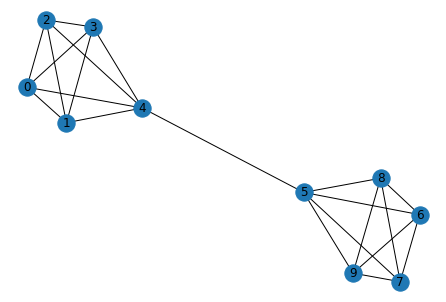

In [6]:
G = nx.barbell_graph(5,0)# a predefined graph function from network x which gives us a graph as shown below.
nx.draw(G,with_labels=True)

Now that we have created a graph like this, let's see if our algorithm is able to detect the communities in the graph.

In [7]:
CommunityDetectionByBruteForce(G)

Communities detected are:
 [0, 1, 2, 3, 4] 
 [5, 6, 7, 8, 9]


## Yes, It worked!
<div class="alert alert-block alert-info">
<b>Conclusion:</b>The split up which has the maximum inter to intra ratio is the best detected community seggregation
</div>